# Importing Libraries

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle


# Loading Dataset

In [16]:
df = pd.read_csv('../data/processed/cleaned_dataset.csv')

In [17]:
df.head()

,time_step,hour,request_x,request_y,assigned_driver,wait_time,surge_multiplier,cancel_probability,cancelled,revenue,fairness_penalty,reward
0,0,6.0,9.507404,11.265511,39.0,1.952673,1.000000,0.097634,0.0,50.000000,0.0,46.094654
1,1,14.0,15.111023,4.575963,9.0,2.151527,1.042394,0.107576,1.0,52.119715,0.0,-30.000000
2,2,18.0,3.224426,18.593953,5.0,0.188175,1.550145,0.009409,0.0,77.507242,0.0,77.130891
3,3,11.0,3.731401,17.851180,5.0,0.899297,1.115819,0.044965,0.0,55.790933,0.1,53.892338
4,4,22.0,17.921826,6.360069,34.0,1.397886,1.000000,0.069894,0.0,50.000000,0.0,47.204229


# Train Test Split

In [18]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Modeling

## 1. Linear Regression

In [19]:
regressor_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

regressor_model.fit(X_train, y_train)

y_pred = regressor_model.predict(X_test)
print("--Linear Regression--")
print("Score:", regressor_model.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, R2: {r2}")
print(f"MSE: {mse}, MAE: {mae}" )

--Linear Regression--
Score: 0.9863657544014487
RMSE: 2.5516992029307546, R2: 0.9863657544014487
MSE: 6.511168822237449, MAE: 1.2591997837582773


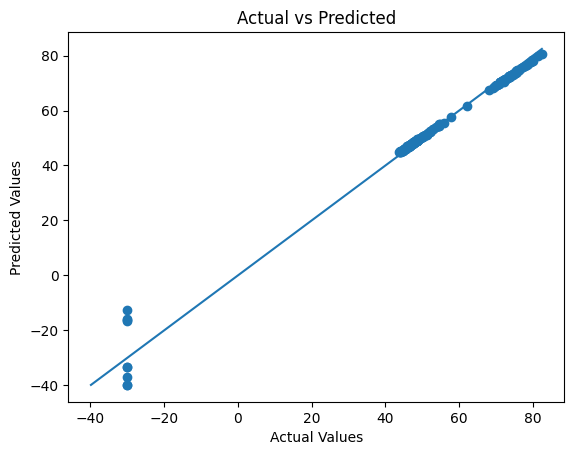

In [20]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_test, y_pred)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

## 2. Random Forest

In [21]:
rf_regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)
print("--Random Forest Regression--")
print("Score:", rf_regressor.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, R2: {r2}")
print(f"MSE: {mse}, MAE: {mae}" )

--Random Forest Regression--
Score: 0.9994207495713766
RMSE: 0.5259532020239556, R2: 0.9994207495713766
MSE: 0.27662677071925185, MAE: 0.32819149270047704


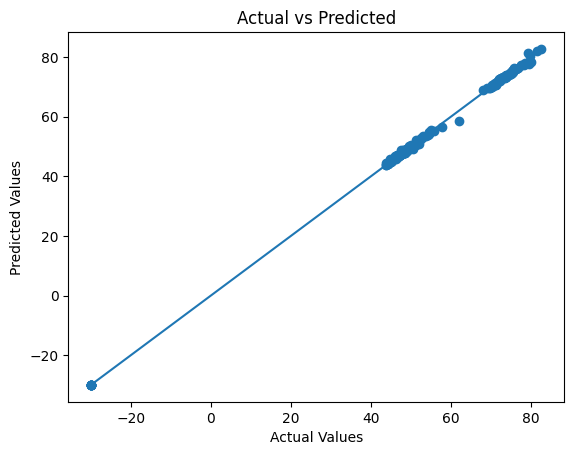

In [22]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_test, y_pred)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# Exporting Model

In [23]:
with open('../models/rf_regressor.pkl', 'wb') as f:
    pickle.dump(rf_regressor, f)